# Decision Trees
## Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# Generate the tree diagram with GraphViz
#$ dot -Tpng iris_tree.dot -o iris_tree.png

![tree diagram](iris_tree.png)

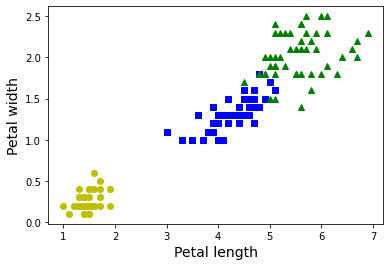

In [3]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.show()

### Making Predictions

The decision tree works exactly as you would expect. For a new instance, the algorithm simply traverses the tree, comparing the relevant instance's relevant feature at each node until it reaches a leaf node, which will indicate the class.

Each node has a _gini impurity_ attribute. A node is "pure" (gini=0) if all of its instances belong to the same class.

Gini impurity: $G_i=1-\sum_{k=1}^n p_{i,k}^2$, where $p_{i,k}^2$ is the ratio of class $k$ instances among the total training instances in the $i$th node.

For example the green node above has gini=0.168.

In [4]:
1-(0/54)**2-(49/54)**2-(5/54)**2 # = 0.16803...

0.1680384087791495

### Estimating Class Probabilities

Let's look at that green node again. The class is versicolor but there are training instances of other classes that match the criteria for that node. In this case, 5 virginica instances had petal width <= 1.75cm, along with the 49 versicolor instances, for 54 total training instances in this node. From these values, we can output class probability predictions.

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regression

In [7]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [8]:
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names=["x"],
    rounded=True,
    filled=True
)

# Generate the tree diagram with GraphViz
#$ dot -Tpng regression_tree.dot -o regression_tree.png

![regression tree diagram](regression_tree.png)

### Instability

Decision trees are simple to understand and interpret and easy to use. However they have significant limitations. The biggest issue is they are very sensitive to variations in the training data. It is very easy to overfit the training data. In practice an individual decision tree is not very useful, but averaging predictions from a collection of decision trees gives better results. This is the concept of Random Forests, covered in the next chapter.

In [9]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.4)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(), {'max_leaf_nodes': list(range(2, 20))}, cv=5)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19]})

In [12]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4)

In [13]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.85